In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')



In [2]:
mouse_data = pd.read_csv("resources/mouse_drug_data.csv")
clinical_data = pd.read_csv("resources/clinicaltrial_data.csv")
# mouse_data.head()
# clinical_data.head()

In [3]:
combined_data = pd.merge(clinical_data, mouse_data, on= 'Mouse ID', how='left')
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [4]:
Tumor_volume_mean = combined_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
Tumor_volume_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
Tumor_volume_sem = combined_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()
Tumor_volume_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
Tumor_mean_tidy = Tumor_volume_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
Tumor_mean_tidy.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


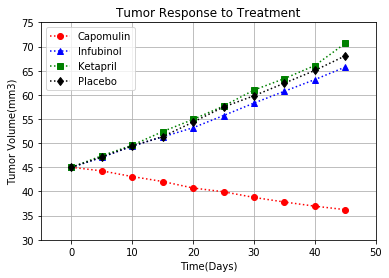

In [7]:
x_axis = Tumor_mean_tidy.index
plt.plot(x_axis, Tumor_mean_tidy.Capomulin, marker = 'o', ls = ':', color = 'red', label ="Capomulin")
plt.plot(x_axis, Tumor_mean_tidy.Infubinol, marker = '^', ls =':', color = 'blue', label = "Infubinol")
plt.plot(x_axis, Tumor_mean_tidy.Ketapril, marker ='s', ls =':', color ='green', label = "Ketapril")
plt.plot(x_axis, Tumor_mean_tidy.Placebo, marker = 'd', ls = ':', color = 'black', label = "Placebo")
plt.xlim(-5, 50)
plt.ylim(30, 75)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.grid()
plt.legend()
plt.show()